In [1]:
# Author       : Praveen Kumar N
# E-Mail       : praveenkumar.npc9@gmail.com
# Contact      : +91-9738407481
# Decision Tree

## Decision Trees

1. Introduction to Decision Trees
2. The Decision Tree Algorithms
3. Decision Tree for Classification
4. Decision Tree for Regression
5. Advantages & Limitations of Decision Trees

### 1. Introduction to Decision Trees
```
* Non-parametric supervised learning method for regression & classification
* It's similar to playing 'dumb charades'.
* A good algorithm will have less & right questions compared to not-so-good one
* The nodes are questions & leafs are prediction
```


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
play_data1 = pd.read_csv('tennis.csv')
play_data1

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [4]:
play_data=play_data1.drop(columns=['day'])#droping 'day' column since it is index
play_data

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


* A decision tree for above data

<img src="https://github.com/PraveenNpc/ML/blob/main/DT/dt4.png?raw=true" width="600px">

### 2. Decision Tree Algorithm

* Decision Tree is based on (CART) which is advancement of ID3, developed in 1986 by Ross Quinlan.
* ID3 works when feature data & target data both are categorical in nature
* C4.5 is an advancement of ID3, it coverts continues features into categorical features. Then, proceeds with ID3
* CART is based on C4.5, with slight advancement of 'target can be continous'.
* scikit-learn decision trees are based on CART

#### Criterion of creating Decision Tree
* Entropy - Objective of CART is to maximize information gain in each split
* Gini Impurity - If classes are mixed, gini impurity is maximul
##### Both the approaches, yields almost same results. We will discuss algorithm using Entropy


### Entropy of play
* Entropy(play) = – p(Yes) . log2p(Yes) – p(No) . log2p(No)

In [5]:
play_data.play.value_counts()

Yes    9
No     5
Name: play, dtype: int64

In [6]:
Entropy_Play = -(9/14)*np.log2(9/14) -(5/14)*np.log2(5/14)

In [7]:
Entropy_Play

0.9402859586706311

### Information Gain
* The information gain is based on the decrease in entropy after a dataset is split on an attribute. 
* Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
* Gain(S, A) = Entropy(S) – ∑ [ p(S|A) . Entropy(S|A) ]
* We intend to choose the attribute, splitting by which information gain will be the most
* Next step is calculating information gain for all attributes

#### Information Gain on splitting by Outlook
* Gain(Play, Outlook) = Entropy(Play) – ∑ [ p(Play|Outlook) . Entropy(Play|Outlook) ]
* Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – [ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ]  – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ] 

In [8]:
play_data[play_data.outlook == 'Sunny']

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


In [9]:
# Entropy(Play|Outlook=Sunny)
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [10]:
Entropy_Play_Outlook_Sunny

0.9709505944546686

In [11]:
play_data[play_data.outlook == 'Overcast']

,outlook,temp,humidity,wind,play
2,Overcast,Hot,High,Weak,Yes
6,Overcast,Cool,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes


In [12]:
# Entropy(Play|Outlook=overcast)
# Since, it's a homogenous data entropy will be 0

In [13]:
play_data[play_data.outlook == 'Rain']

,outlook,temp,humidity,wind,play
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
9,Rain,Mild,Normal,Weak,Yes
13,Rain,Mild,High,Strong,No


In [14]:
# Entropy(Play|Outlook=rainy)
Entropy_Play_Outlook_Rain = -(2/5)*np.log2(2/5) - (3/5)*np.log2(3/5)

In [15]:
Entropy_Play_Outlook_Rain

0.9709505944546686

#### Gain on splitting by attribute outlook

In [16]:
#Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – 
#[ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ] – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ]

Entropy_Play - (5/14)*Entropy_Play_Outlook_Sunny - (4/14)*0 - (5/14) * Entropy_Play_Outlook_Rain 

0.24674981977443933

#### Other gains
* Gain(Play, Temperature) - 0.029
* Gain(Play, Humidity) - 0.151
* Gain(Play, Wind) - 0.048

#### Conclusion - Outlook is winner & thus becomes root of the tree
<img src="https://github.com/PraveenNpc/ML/blob/main/DT/dt2.png?raw=true" width="600px">

### Time to find the next splitting criteria

In [17]:
play_data[play_data.outlook == 'Overcast']

,outlook,temp,humidity,wind,play
2,Overcast,Hot,High,Weak,Yes
6,Overcast,Cool,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes


##### Conclusion - If outlook is overcast, play is true

### Let's find the next splitting feature

In [18]:
play_data[play_data.outlook == 'Sunny']

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


In [19]:
# Entropy(Play_Sunny|)
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [20]:
Entropy_Play_Outlook_Sunny

0.9709505944546686

### Information Gain for humidity

In [21]:
#Entropy for attribute high = 0, also entropy for attribute normal = 0 
Entropy_Play_Outlook_Sunny - (3/5)*0 - (2/5)*0

0.9709505944546686

### Information Gain for windy
* False -> 3 -> [1+ 2-]
* True -> 2 -> [1+ 1-]

In [22]:
Entropy_Wind_False = -(1/3)*np.log2(1/3) - (2/3)*np.log2(2/3)

In [23]:
Entropy_Wind_False

0.9182958340544896

In [24]:
Entropy_Play_Outlook_Sunny - (3/5)* Entropy_Wind_False  - (2/5)*1 

0.01997309402197489

### Information Gain for temperature
* hot -> 2 -> [2- 0+]
* mild -> 2 -> [1+ 1-]
* cool -> 1  -> [1+ 0-]

In [25]:
Entropy_Play_Outlook_Sunny - (2/5)*0 - (1/5)*0 - (2/5)* 1

0.5709505944546686

#### Conclusion : Humidity is the best choice on sunny branch

<img src="https://github.com/PraveenNpc/ML/blob/main/DT/dt3.png?raw=true" width="600px">

In [26]:
play_data[(play_data.outlook == 'Sunny') & (play_data.humidity == 'High')]

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
7,Sunny,Mild,High,Weak,No


In [27]:
play_data[(play_data.outlook == 'Sunny') & (play_data.humidity == 'Normal')]

,outlook,temp,humidity,wind,play
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


### Splitting the rainy branch

In [28]:
play_data[play_data.outlook == 'Rain']

,outlook,temp,humidity,wind,play
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
9,Rain,Mild,Normal,Weak,Yes
13,Rain,Mild,High,Strong,No


In [29]:
# Entropy(Play_Rainy|)
Entropy_Play_Outlook_Rainy =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [30]:
Entropy_Play_Outlook_Rainy

0.9709505944546686

### Information Gain for temp
* mild -> 3 [2+ 1-]
* cool -> 2 [1+ 1-]

In [31]:
Entropy_Play_Outlook_Rainy - (3/5)*0.918 - (2/5)*1

0.020150594454668602

### Information Gain for Windy

In [32]:
Entropy_Play_Outlook_Rainy - (2/5)*0 - (3/5)*0

0.9709505944546686

### Information Gain for Humidity
* High -> 2 -> [1+ 1-]
* Normal -> 3 -> [2+ 1-]

In [33]:
Entropy_Play_Outlook_Rainy_Normal = -(1/3)*np.log2(1/3) - (2/3)*np.log2(2/3)

In [34]:
Entropy_Play_Outlook_Rainy_Normal

0.9182958340544896

In [35]:
Entropy_Play_Outlook_Rainy - (2/5)*1 - (3/5)*Entropy_Play_Outlook_Rainy_Normal

0.01997309402197489

### Final Tree

<img src="https://github.com/PraveenNpc/ML/blob/main/DT/dt5.png?raw=true" width="600px">

### 3. Decision Tree for Classification
* The leaf nodes of decision tree decides the class
* CART will convert features with continues values into categorical values
* Different tree will be generated with same data given in different order

In [36]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz, ExtraTreeClassifier

In [37]:
iris = load_iris()

In [38]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [39]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [40]:
dt = DecisionTreeClassifier(criterion='entropy')

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
trainX,testX,trainY,testY = train_test_split(iris.data, iris.target)

In [43]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
export_graphviz(dt,'dt.tree')

### Visualizing the tree
* http://www.webgraphviz.com/

* Criteria - Entropy
<img src="https://github.com/PraveenNpc/ML/blob/main/DT/dt6.png?raw=true">

In [45]:
dt.predict(testX)

array([0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1])

#### Feature Importances
* Important features will be higher up the tree
* We can use this techniques to identify important features

In [46]:
dt.feature_importances_

array([0.        , 0.        , 0.04265012, 0.95734988])

#### Visualizing Decision Tree Decision Boundry

In [47]:
from sklearn.datasets import make_blobs

In [48]:
X,Y = make_blobs(n_features=2, n_samples=1000, cluster_std=.8, centers=4, random_state=6)

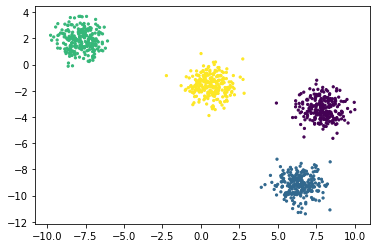

In [49]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5, cmap='viridis')

In [50]:
dt = DecisionTreeClassifier()

In [51]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

In [53]:
outcome = dt.predict(np.c_[xx.ravel(), yy.ravel()])

In [54]:
xx.shape

(86, 109)

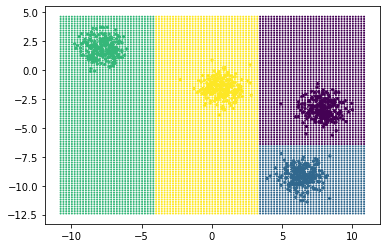

In [55]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5,cmap='viridis')
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,s=1,alpha=1, cmap='viridis')
plt.show()

### 4. Decision Tree for Regression
* Continues target is predicted with Tree.
* ID3 is modified for regression by replacing Information Gain with Mean Squared Error.
* Decision Tree tries to partition data into subsets of homogenous contents ( minimize mean squared error )

In [56]:
play_time1 = pd.read_csv('tennis-time.csv')

In [57]:
play_time1

,day,outlook,temp,humidity,wind,time
0,D1,Sunny,Hot,High,Weak,26
1,D2,Sunny,Hot,High,Strong,30
2,D3,Overcast,Hot,High,Weak,48
3,D4,Rain,Mild,High,Weak,46
4,D5,Rain,Cool,Normal,Weak,62
5,D6,Rain,Cool,Normal,Strong,23
6,D7,Overcast,Cool,Normal,Strong,43
7,D8,Sunny,Mild,High,Weak,36
8,D9,Sunny,Cool,Normal,Weak,38
9,D10,Rain,Mild,Normal,Weak,48


In [58]:
play_time=play_time1.drop(columns=['day'])#droping 'day' column since it is index
play_time

,outlook,temp,humidity,wind,time
0,Sunny,Hot,High,Weak,26
1,Sunny,Hot,High,Strong,30
2,Overcast,Hot,High,Weak,48
3,Rain,Mild,High,Weak,46
4,Rain,Cool,Normal,Weak,62
5,Rain,Cool,Normal,Strong,23
6,Overcast,Cool,Normal,Strong,43
7,Sunny,Mild,High,Weak,36
8,Sunny,Cool,Normal,Weak,38
9,Rain,Mild,Normal,Weak,48


In [59]:
from sklearn.preprocessing import LabelEncoder
for col in ['outlook','temp','humidity','wind']:
    le = LabelEncoder()
    play_time[col] = le.fit_transform(play_time[col])

In [60]:
print (play_time)

    outlook  temp  humidity  wind  time
0         2     1         0     1    26
1         2     1         0     0    30
2         0     1         0     1    48
3         1     2         0     1    46
4         1     0         1     1    62
5         1     0         1     0    23
6         0     0         1     0    43
7         2     2         0     1    36
8         2     0         1     1    38
9         1     2         1     1    48
10        2     2         1     0    48
11        0     2         0     0    62
12        0     1         1     1    44
13        1     2         0     0    30


In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
dt = DecisionTreeRegressor()

In [63]:
dt.fit(play_time.drop('time',axis=1), play_time.time)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [64]:
export_graphviz(dt,'regtree.dot',feature_names=['outlook','temp','humidity','wind'])

In [65]:
play_time

,outlook,temp,humidity,wind,time
0,2,1,0,1,26
1,2,1,0,0,30
2,0,1,0,1,48
3,1,2,0,1,46
4,1,0,1,1,62
5,1,0,1,0,23
6,0,0,1,0,43
7,2,2,0,1,36
8,2,0,1,1,38
9,1,2,1,1,48


<img src="https://github.com/PraveenNpc/ML/blob/main/DT/dt7.png?raw=true">

In [66]:
dt.predict([[2,2,1,1]])

array([38.])

In [67]:
dt.feature_importances_

array([0.29746223, 0.38850867, 0.14515689, 0.16887221])

### 5. Advantages of Decision Tree
* Highly Interpretable & can be visualized
* Minimal data preprocessing - missing data handling, normalizing, one-hot-encoding not required
* Handle both neumerical & categorical values
* Supports multi-output 

#### Understanding Multi-Output Problem
* Supervised learning problem with multiple outputs, target is 2D
* If there is no correlation between target, they can be independently calculated using N models ( in case of N targets )
* Since predictors are same, outputs are likely to be correlated.
* Like many other models, decision trees allows for multi-output targets

### 6. Limitations of Decision Tree
* Overfitting - height of tree kept growing with addition of more data
* Slight changes in data or order of data can change the tree
* Imbalanced classes datasets creates biased tree so data needs balancing

##### The above two limitations are handled by ensemble methods

#### Pruning
* A technique of machine learning which reduces height of the tree by chopping off parts of the tree that's not doing anything significant in prediction
* Two types of pruning - Prepruning & Postpruning
  - Prepruning : Don't allow tree to grow beyond this point
  - Postpruning : Allows tree to grow as much as possible, then prune the tree

* Post Pruning is not currently supported in scikit
* This can be achieved using min_samples_leaf & max_depth